In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lib.imports import *
from lib.utils import *
from lib.modules import *
from lib.functions import *
from ipynb.fs.defs.losses import *

In [3]:
G_list, data_list = load_processed_data(G_list_file='G_list_1.pickle',
                                        data_list_file='data_list_1.pickle')

In [4]:
len(data_list)

11531

In [5]:
idx = 976
G, data = G_list[idx], data_list[idx]

In [23]:
stress, angle, edge, ring = [], [], [], []
for i in range(10000, 11000):
    G, data = G_list[i], data_list[i]
    result = get_gt_performance_metrics(data, G, criteria_list=[RescaledL1AngularLoss(), EdgeLengthVarianceLoss(), ExponentialRingLoss()])
    stress.append(result['gt_stress'])
    angle.append(result['gt_losses'][0])
    edge.append(result['gt_losses'][1])
    ring.append(result['gt_losses'][2])


tensor(125.9655)

In [21]:
criterion = RescaledL1AngularLoss()
mean = []
for i in range(10000,11000):
    print(i)
    mean.append(criterion(get_ground_truth(data_list[i], G_list[i]),Batch.from_data_list([data_list[i]])).item())

10000
10001
10002
10003
10004
10005
10006
10007
10008
10009
10010
10011
10012
10013
10014
10015
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10041
10042
10043
10044
10045
10046
10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
1016

In [27]:
sum(mean)/len(mean)

5152.614646816253

In [ ]:
for i in tqdm(range(10000, 11000)):
    data, G = data_list[i], G_list[i]
    graph_vis(G, get_ground_truth(data, G), f'graphviz_baseline/rome_{i}.png')

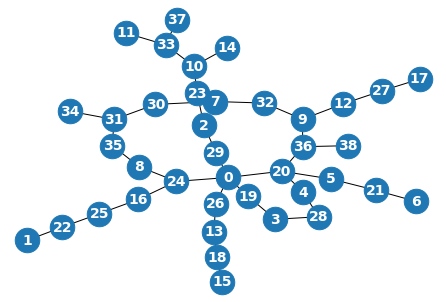

In [7]:
graph_vis(G, get_ground_truth(G), node_size=600, with_labels=True, font_color="white", font_weight="bold", font_size=14)

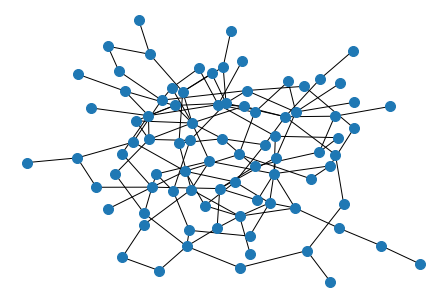

In [5]:
graph_vis(G, get_ground_truth(G))

In [225]:
umap_pos = umap_project(ground_truth(G), n_neighbors=15, min_dist=1)

In [226]:
umap_scale = get_stress_minimizing_scale(umap_pos, data)

In [227]:
scaled_umap_pos = umap_pos * umap_scale

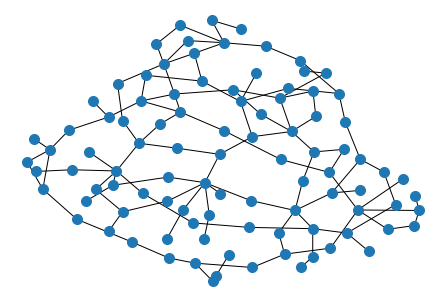

In [228]:
graph_vis(G, scaled_umap_pos)

In [9]:
scaled_ground_truth = pd.read_csv('scaled_gt_loss.csv', index_col=0)
folder_name = f"graphviz_baseline"
if not os.path.isdir(folder_name):
    os.mkdir(folder_name)

In [ ]:
for test_idx in tqdm(range(10000, 11000)):
    G_vis = G_list[test_idx]
    gt_loss = scaled_ground_truth.loc[test_idx][0]
    node_pos = get_ground_truth(G_vis)
    graph_vis(G_vis, node_pos, file_name=f'{folder_name}/{test_idx}_{gt_loss:.2f}.png')

In [7]:
idx = 10263
data, G = data_list[idx], G_list[idx]
criterion = EnergyLossVectorized()
truth = get_ground_truth(G)
scale = get_stress_minimizing_scale(truth, data)

In [8]:
scale

0.013888920323278956

In [9]:
criterion(torch.tensor(truth) * scale, data)

tensor(63.0926, dtype=torch.float64)

In [12]:
get_counter_clockwise_sorted_angle_vertices(np.array([[0,1],[1,0],[1,2],[2,1]]), np.array([[0,0],[0,0],[0,0]]))

array([[1, 0, 2],
       [1, 2, 0]])